In [1]:
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
my_rng = np.random.default_rng(seed = 42)
test_a = my_rng.normal(100, 15, (100,1))
test_b = test_a + my_rng.normal(0, 10, test_a.shape)

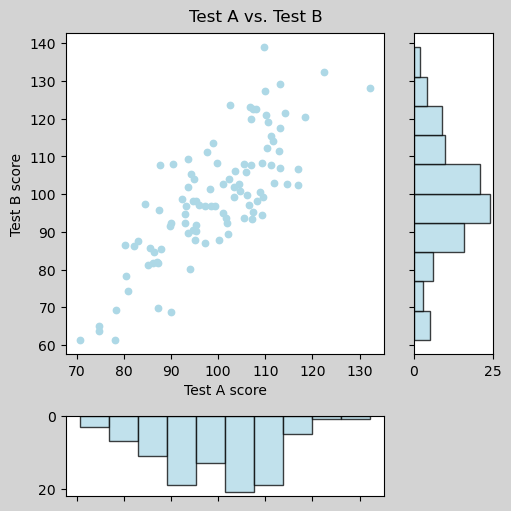

In [3]:
gs_kw = dict(width_ratios=[4, 1], 
             height_ratios=[4, 1],
             wspace=0.1, hspace=0.05)

fig, axd = plt.subplot_mosaic([['scatter', 'hist_y'],
                               ['hist_x', 'blank']],
                              gridspec_kw=gs_kw, 
                              figsize=(5, 5), 
                              layout="constrained")

axd['scatter'].scatter(test_a, test_b,
                      c = 'lightblue',
                      s = 21)
axd['scatter'].set_xlabel('Test A score')
axd['scatter'].set_ylabel('Test B score')


# x axis histogram
axd['hist_x'].hist(test_a,
                  facecolor = 'lightblue',
                  alpha = 0.75,
                  edgecolor = 'k')
axd['hist_x'].invert_yaxis()
axd['hist_x'].tick_params(axis="x", labelbottom=False)


# x axis histogram
axd['hist_y'].hist(test_b, orientation='horizontal',
                  facecolor = 'lightblue',
                  alpha = 0.75,
                  edgecolor = 'k')

axd['hist_y'].tick_params(axis="y", labelleft=False)


axd['blank'].axis('off')


fig.suptitle('Test A vs. Test B');
fig.set_facecolor('lightgray')

In [5]:
x = test_a
y = test_b

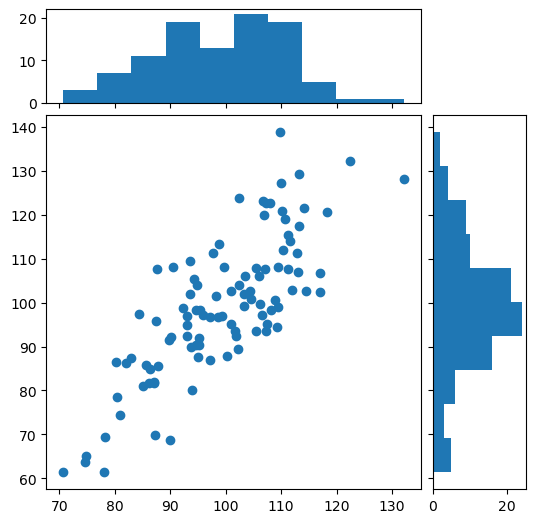

In [6]:
# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)


# no labels
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# the scatter plot:
ax.scatter(x, y);

# now determine nice limits by hand:
#binwidth = 0.25
#xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
#lim = (int(xymax/binwidth) + 1) * binwidth
#bins = np.arange(-lim, lim + binwidth, binwidth)

ax_histx.hist(x);
ax_histy.hist(y, orientation='horizontal');